# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:**Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 16/11/2020.

**Tema:** Regresión:COVID-19 ECUADOR

# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [228]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [229]:
plt.rcParams['figure.figsize'] = [10, 10]
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-11-10,554657,224.0,525.0,642.0,54.0,98.0,0.0,0.0,8317.0,...,239.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0,17.0,30.0
316,2020-11-11,552067,0.0,563.0,753.0,40.0,247.0,0.0,0.0,11976.0,...,146.0,1.0,0.0,562.0,10.0,0.0,0.0,0.0,26.0,49.0
317,2020-11-12,585999,146.0,507.0,811.0,90.0,136.0,0.0,0.0,10880.0,...,224.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,39.0,57.0
318,2020-11-13,634117,360.0,410.0,851.0,49.0,137.0,0.0,0.0,11162.0,...,220.0,0.0,0.0,695.0,1.0,0.0,0.0,0.0,0.0,29.0


Imprimos los resultados y agregamos el numero del dia


In [230]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
315,314,362.0
316,315,442.0
317,316,919.0
318,317,883.0


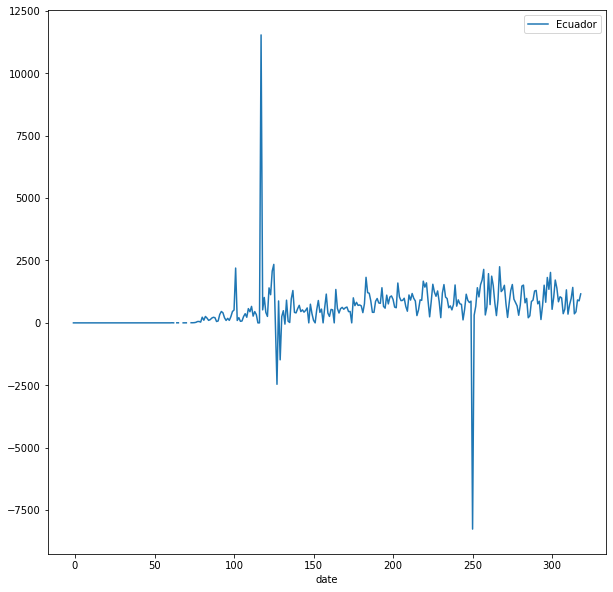

In [231]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [232]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


663.0
703.4409448818898


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [235]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

179330


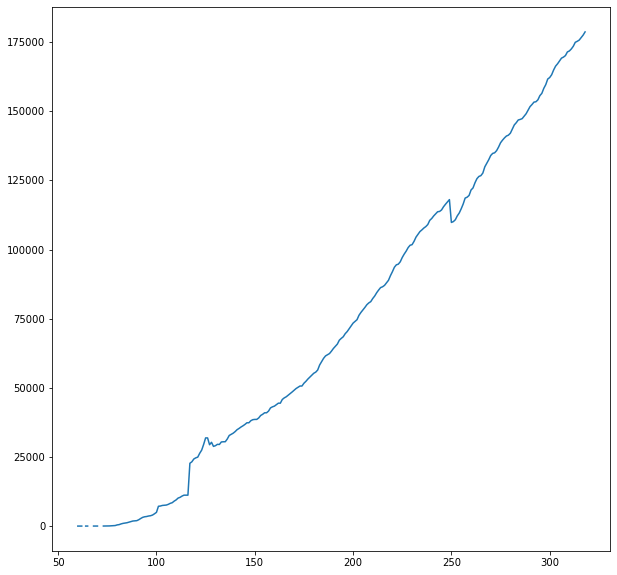

In [236]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a menos 7 dias.
for i in range(x[-1], x[-1]-7):
    x.append(i)
    y.append(int(y[-1] + mediana))
valorProbabilistico=y[319]
plt.plot(x[61:], y[61:])
plt.show()

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.
Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

# 1) Comparar el modelo de predicción matemático vs probabilidad.

# REGRESION POLINOMIAL

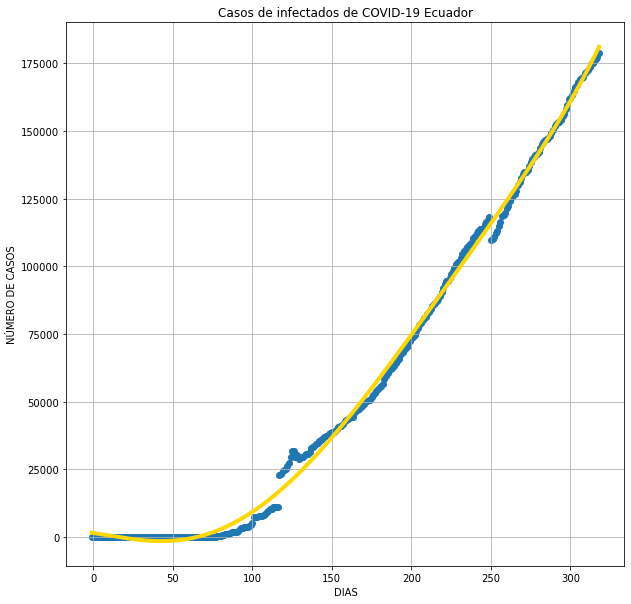

In [271]:
from sklearn.preprocessing import PolynomialFeatures

x = list(df_t.iloc[:, 0]) # Dias
y = list(df_t.iloc [:, 1]) # Total caso

y= np.nan_to_num(y)#Eliminar los valores NAN, remplazando con ceros.
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

#Como se veia en el caso de la regresion lineal , para obtener mejores resultados lo ideal sería una curva

#Esta transformación la podemos realizar fácilmente son SkLearn gracias PolynomialFeatures(). A la que le indicamos el grado de la función que queremos obtener. Haciendo uso del método fit_transform() obtendremos el término cuadrático que andamos buscando para nuestro modelo.
poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly.fit_transform(x)
#print(x)
#print(x_poly)

#Defino el algoritmo a utilizar
model = linear_model.LinearRegression()

#Entrenamos
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
y_pred = y_pred-7#RETROCEDEMOS 7 DÍAS
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.scatter(x, y)
plt.plot(x, y_pred, color='gold',lw=4)
plt.grid(True)
plt.xlabel('DIAS')
plt.ylabel('NÚMERO DE CASOS')
plt.show()

Desde mi perpectiva el mejor modelo que se ajusta es el **MODELO POLINOMIAL** ya que este ajusta de mejor manera los datos, pero esto se logra gracias a un ecuacion de Quinto Grado.

# 2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

FECHA:14/11/2020

# MODELO BASADO EN PROBABILIDAD

In [274]:
valorProbabilistico=valorProbabilistico-7
print('Número de casos hace 7 días',np.round(valorProbabilistico,1))

Número de casos hace 7 días 178583.0


# MODELO LOGISTICO

In [275]:
valorLogistico=y_pred[319-7]
print('Número de casos hace 7 días',np.round(valorLogistico,0))

Número de casos hace 7 días [172898.]


# DATOS REALES

FUENTE:
https://www.eluniverso.com/noticias/2020/11/07/nota/8040589/coronavirus-7-noviembre-ecuador-ministerio-casos-covid

# TOTAL DE CASO

173.486

## Analisis
Se puede evidenciar que el modelo que más se asemeja es el **MODELO POLINOMIAL** ya que el modelo ya que tiene una menor diferencia con referencia a los datos verdaderos.Tiene una diferencia de -588.

El **MODELO BASADO EN PROBABILIDAD** tiene un diferencia de +5104 por ende es un error mayor.



# Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

**¿Qué es el coeficiente de correlación?**

El mas famosos es el coeficiente de correlación o correlación de Pearson.

Este coeficiente sólo debe utilizarse para comparar variables cuantitativas y continuas.

Un coeficiente de correlación es un número que denota la fuerza de la relación entre dos variables.

La correlación es cuado una variable independiente (X), varia o cambia largo del tiempo de igual manera la variable indepediente(y) también cambia.

Me permite determinar si existe alguna relacion entre dos o más variables.

**RANGOS**

- **0** ->NO EXISTE RELACION LINEAL.

**CORRELACION POSITIVA**

- **1**->EN LA QUE INCREMENTA UNA Y LA OTRA TAMBIEN INCREMENTA

**CORRELACION NEGATIVA**

- **-1**-> CRECE UNA VARIABLE Y LA OTRA DECRECE.



In [31]:
#Calculamos el Coeficiente de Correlación de Pearson, y mostramos los resultados en una matriz:
df_t.corr(method='pearson')
df_t.corr()

,date,Ecuador
date,1.000000,0.991979
Ecuador,0.991979,1.000000


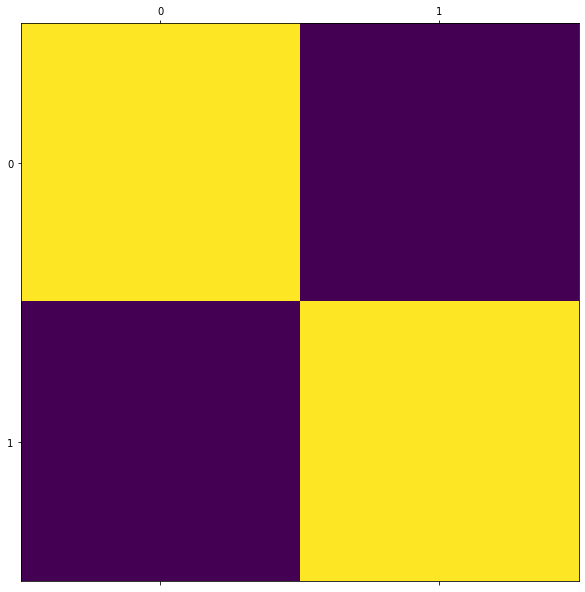

In [32]:
# Crearemos un gráfico con la matriz de correlación:
plt.matshow(df_t.corr())

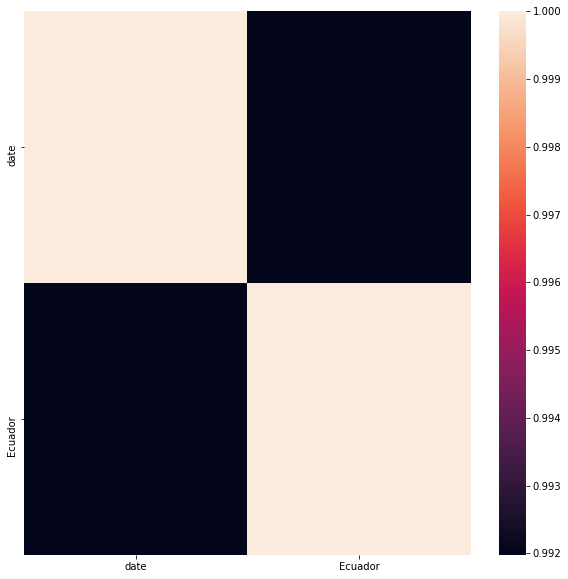

In [33]:
#UTILIZANDO LA BIBLIOTECA SEABORN
#Para graficar la matriz, usaremos una biblioteca de visualización popular llamada seaborn, que está incorporada en matplotlib.
import seaborn as sns #Importamos 
correlacion = df_t.corr()
sns.heatmap(correlacion, xticklabels = correlacion.columns.values, yticklabels = correlacion.columns.values)

La columna diagonal siemre va tener un valor de uno, ya que se esta comparado la variable consigo mismo.

# INTERPRETACION
Lo que más nos importa es la relación entre los días(date) y los número de casos (Ecuador) para poder tomar decisiones.

El coeficiente de correlación de Pearson, para días y número de casos es de 0.99, podemos considerar una relación directa entre ambas variables. Hagamos un gráfico para observar mejor esto:

Text(0, 0.5, 'Número de Casos')

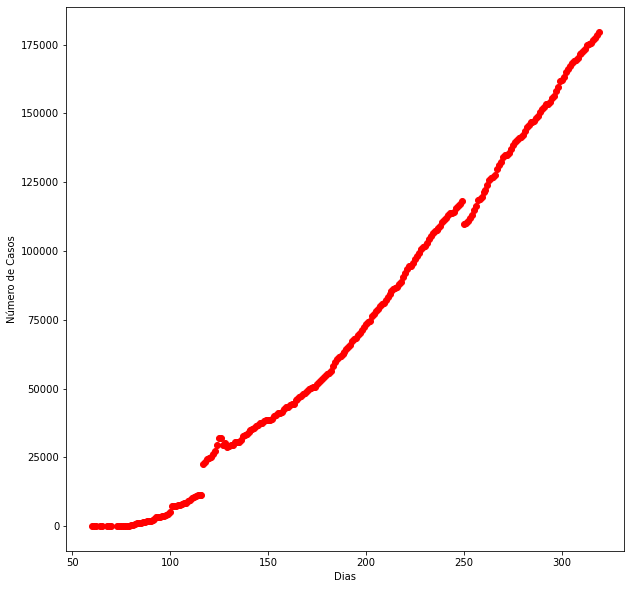

In [34]:
x = list(df_t.iloc[:, 0]) # Dias
y = list(df_t.iloc [:, 1]) # Total caso
plt.plot(x,y,'ro')
plt.xlabel('Dias')
plt.ylabel('Número de Casos')

Existe cierta tendencia lineal entre estas variables, de manera que a mayor número de días, se traducirá en más casos de COVID-19.


## Conclusiones


- Desde mi punto de vista un regresion Polinomial al ser un caso especial puede ayudar a predecir datos a futuro de una mejor manera, ojo pero siempre tendiendo en cuenta que este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos. 

- Si no hago correlación no puedo saber si un conjuto de datos es o no independiente de las muestras anteriores, cuando se toma un valor aleatorio.



## Criterio personal (politico, economico y  social de la situacion)

- La regresión es importante ya  que me ayuda a poder visualizar de mejor manera como influye la variable independiente sobre la depediente a nivel politico, economico y social para de esta manera poder tomar mejores decisiones , además de obtener información empresarial valiosa.

- La correlación es una herramienta estadística muy valiosa para poder hacer la comparación entre variables numéricas de manera sencilla. 


# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

- https://likegeeks.com/es/matrix-correlacion-python/
- https://medium.com/@hdezfloresmiguelangel/el-coeficiente-de-correlaci%C3%B3n-de-pearson-con-ejemplo-en-python-6e8588f67e35
